## Load data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("flood_predictions.csv")


## Flood Heatmap by Location (Aggregate All Time)

c:\Users\Fernando\PycharmProjects\analise-alagamento\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Fernando\PycharmProjects\analise-alagamento\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


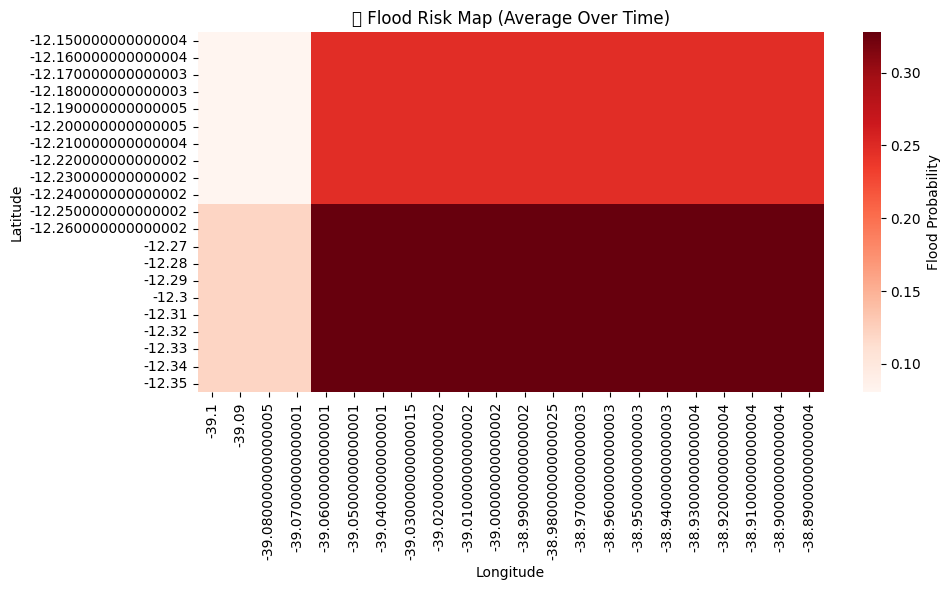

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap = df.groupby(["lat", "lon"])["predicted_flood"].mean().reset_index()
pivot = heatmap.pivot(index="lat", columns="lon", values="predicted_flood")
pivot = pivot.sort_index(ascending=False)  # North is up

plt.figure(figsize=(10, 6))
plt.title("📍 Flood Risk Map (Average Over Time)")
sns.heatmap(pivot, cmap="Reds", cbar_kws={"label": "Flood Probability"})
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


## Flood Frequency Over Time

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16116\1036356497.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Fernando\PycharmProjects\analise-alagamento\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


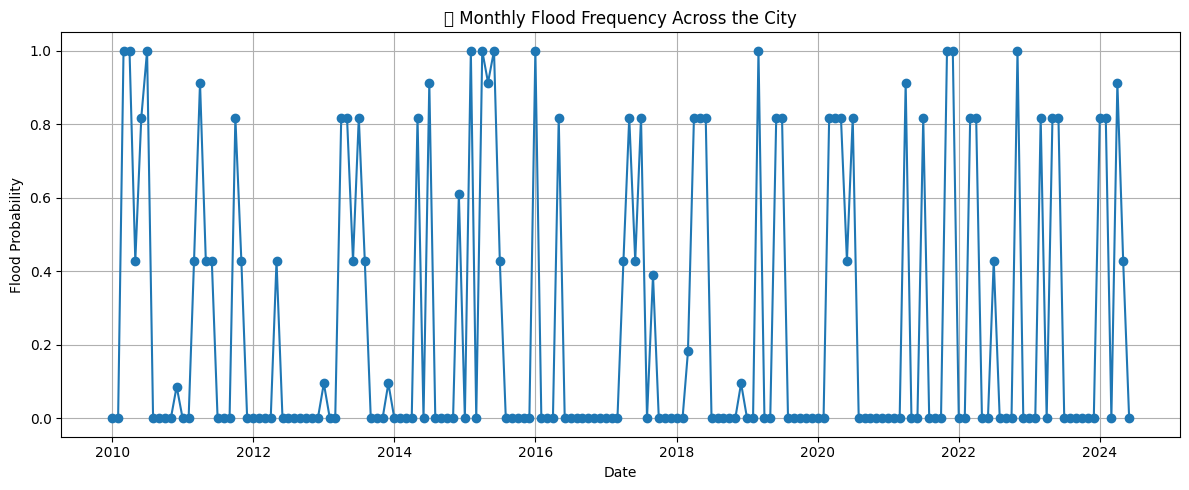

In [5]:
monthly = df.groupby(["year", "month"])["predicted_flood"].mean().reset_index()
monthly["date"] = pd.to_datetime(monthly[["year", "month"]].assign(day=1))

plt.figure(figsize=(12, 5))
plt.plot(monthly["date"], monthly["predicted_flood"], marker="o")
plt.title("📈 Monthly Flood Frequency Across the City")
plt.ylabel("Flood Probability")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


## Map a Single Month

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16116\3940252216.py:10: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Fernando\PycharmProjects\analise-alagamento\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fernando\PycharmProjects\analise-alagamento\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


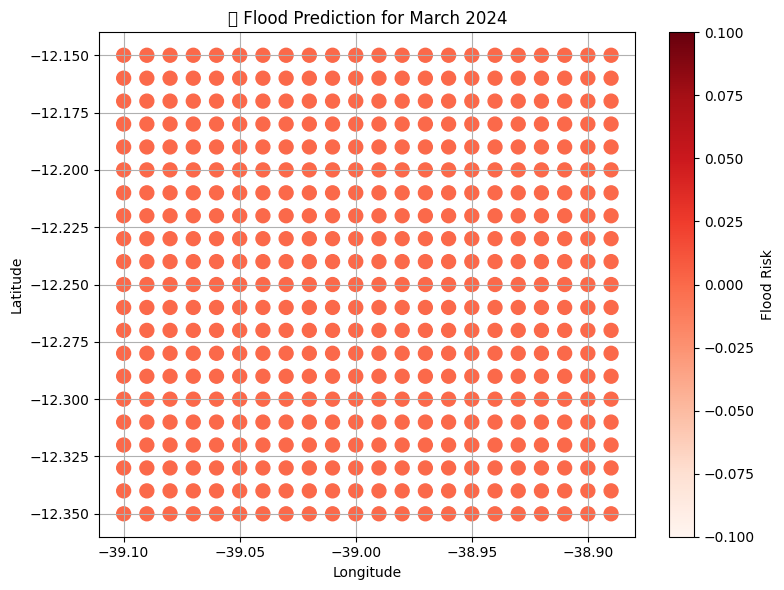

In [6]:
subset = df[(df["year"] == 2024) & (df["month"] == 3)]

plt.figure(figsize=(8, 6))
plt.scatter(subset["lon"], subset["lat"], c=subset["predicted_flood"], cmap="Reds", s=100)
plt.colorbar(label="Flood Risk")
plt.title("🗺️ Flood Prediction for March 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📍 1. Flood Risk Map (Average Over Time)


✅ Saved flood_map_avg.png


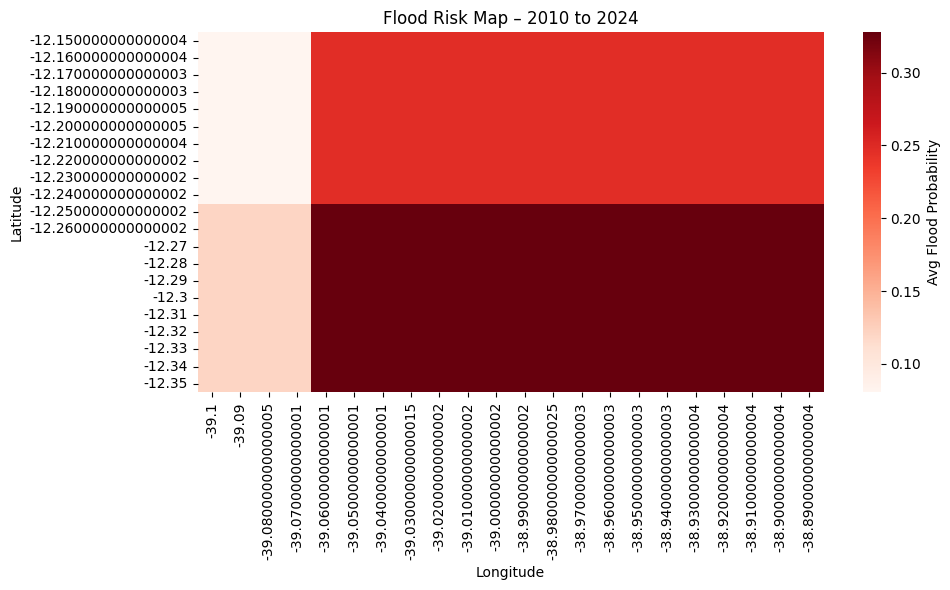

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("flood_predictions.csv")

# Aggregate flood probability per location
agg = df.groupby(["lat", "lon"])["predicted_flood"].mean().reset_index()
pivot = agg.pivot(index="lat", columns="lon", values="predicted_flood")
pivot = pivot.sort_index(ascending=False)  # So north is up

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="Reds", cbar_kws={"label": "Avg Flood Probability"})
plt.title("Flood Risk Map – 2010 to 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig("flood_map_avg.png", dpi=300)
print("✅ Saved flood_map_avg.png")


## 📆 2. Flood Map for a Specific Month

✅ Saved flood_map_2024_01.png


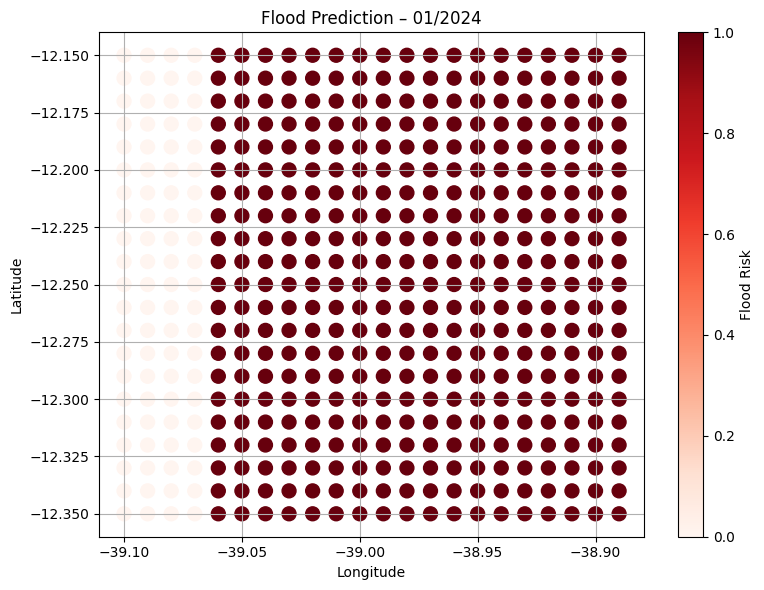

In [7]:
# Pick your month
year, month = 2024, 1
monthly = df[(df["year"] == year) & (df["month"] == month)]

plt.figure(figsize=(8, 6))
plt.scatter(monthly["lon"], monthly["lat"], c=monthly["predicted_flood"], cmap="Reds", s=100)
plt.colorbar(label="Flood Risk")
plt.title(f"Flood Prediction – {month:02d}/{year}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"flood_map_{year}_{month:02d}.png", dpi=300)
print(f"✅ Saved flood_map_{year}_{month:02d}.png")


## 📈 3. Flood Trend Over Time


✅ Saved flood_trend.png


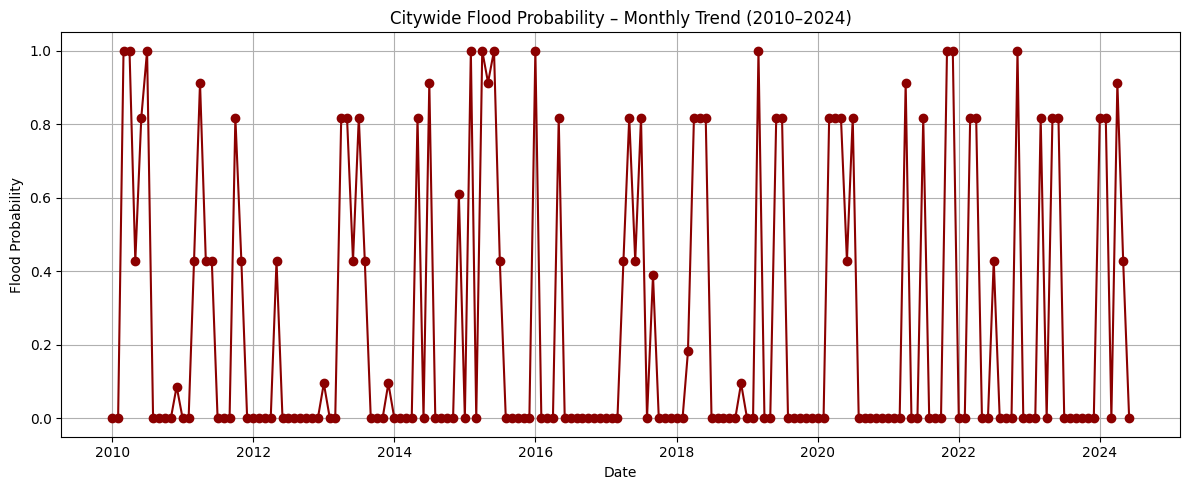

In [8]:
df["date"] = pd.to_datetime(df[["year", "month"]].assign(day=1))
monthly_trend = df.groupby("date")["predicted_flood"].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker="o", color="darkred")
plt.title("Citywide Flood Probability – Monthly Trend (2010–2024)")
plt.ylabel("Flood Probability")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.savefig("flood_trend.png", dpi=300)
print("✅ Saved flood_trend.png")


## Convert CSV to GeoJSON

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# === Load your flood predictions ===
df = pd.read_csv("flood_predictions.csv")

# === Convert to geometry ===
geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# === Set coordinate reference system (WGS 84) ===
gdf.set_crs(epsg=4326, inplace=True)

# === Save to GeoJSON ===
gdf.to_file("flood_predictions.geojson", driver="GeoJSON")
print("✅ Saved as flood_predictions.geojson")


✅ Saved as flood_predictions.geojson
